## Exoplanet Hunting in Deep Space

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
TrainData = pd.read_csv('.//exoTrain.csv')
TestData = pd.read_csv('.//exoTest.csv')

In [3]:
TrainData.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [4]:
y_train = TrainData['LABEL']
y_train = y_train - 1
TrainData.drop('LABEL', axis=1, inplace=True)
X_train = TrainData

In [5]:
y_test = TestData['LABEL']
y_test = y_test - 1
TestData.drop('LABEL', axis=1, inplace=True)
X_test = TestData

In [6]:
Report1 = X_train.isnull().any().any()
Report1

False

In [7]:
Report2 = X_test.isnull().any().any()
Report2

False

In [8]:
def PreprocessData(X_train, X_test):
    scaler = MaxAbsScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [9]:
def Model_(X_train, X_test, y_train, y_test, Model, PreProcess):
    
    if PreProcess==1:
        X_train_scaled, X_test_scaled = PreprocessData(X_train, X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    Model.fit(X_train_scaled, y_train)
    y_test_predict = Model.predict(X_test_scaled)
    if hasattr(Model, "decision_function"):
        y_score = Model.decision_function(X_test_scaled)
    else:
        y_score = Model.predict_proba(X_test_scaled)[:,1]
    
    Accuracy = accuracy_score(y_test, y_test_predict)
    Precision = precision_score(y_test, y_test_predict, average='weighted')
    Recall = recall_score(y_test, y_test_predict, average='weighted')
    f1 = f1_score(y_test, y_test_predict, average='weighted')
    AU_ROC = roc_auc_score(y_test, y_score, average='weighted')
    return Accuracy, Precision, Recall, f1, AU_ROC, y_score

### Stochastic Gradient Descent

In [10]:
Model_1 = SGDClassifier(loss='modified_huber', penalty='l1', max_iter=1000, fit_intercept=True, shuffle=True, n_jobs=-1,
                          average=True,early_stopping=True, learning_rate='adaptive', eta0=0.01)
Accuracy, Precision, Recall, f1, AU_ROC, y_pred_M1 = Model_(X_train, X_test, y_train, y_test, Model_1, PreProcess=1)
print("Stochastic Gradient Descent Model: ")
print("Accuracy :\t","{:0.10f}".format(Accuracy))
print("Precision :\t","{:0.10f}".format(Precision))
print("Recall :\t","{:0.10f}".format(Recall))
print("f1-score :\t","{:0.10f}".format(f1))
print("Area under ROC curve :\t","{:0.10f}".format(AU_ROC))

Stochastic Gradient Descent Model: 
Accuracy :	 0.9859649123
Precision :	 0.9859649123
Recall :	 0.9859649123
f1-score :	 0.9859649123
Area under ROC curve :	 0.4152212389


### Support Vector Machine

In [11]:
Model_2 = SVC(C=1.0, kernel='rbf', probability=True, class_weight='balanced', gamma='scale',
              decision_function_shape='ovo', verbose=True)
Accuracy, Precision, Recall, f1, AU_ROC, y_pred_M2 = Model_(X_train, X_test, y_train, y_test, Model_2, PreProcess=0)
print("Support Vector Machine Model: ")
print("Accuracy :\t","{:0.10f}".format(Accuracy))
print("Precision :\t","{:0.10f}".format(Precision))
print("Recall :\t","{:0.10f}".format(Recall))
print("f1-score :\t","{:0.10f}".format(f1))
print("Area under ROC curve :\t","{:0.10f}".format(AU_ROC))

[LibSVM]Support Vector Machine Model: 
Accuracy :	 0.9894736842
Precision :	 0.9825178059
Recall :	 0.9894736842
f1-score :	 0.9859834772
Area under ROC curve :	 0.7410619469


### Gradient Boosting Classifier

In [12]:
Model_3 = GradientBoostingClassifier(loss='deviance',max_features='auto',learning_rate=0.4, verbose=1, warm_start=True)
Accuracy, Precision, Recall, f1, AU_ROC, y_pred_M3 = Model_(X_train, X_test, y_train, y_test, Model_3, PreProcess=0)
print("Gradient Boosting Classifier Model: ")
print("Accuracy :\t","{:0.10f}".format(Accuracy))
print("Precision :\t","{:0.10f}".format(Precision))
print("Recall :\t","{:0.10f}".format(Recall))
print("f1-score :\t","{:0.10f}".format(f1))
print("Area under ROC curve :\t","{:0.10f}".format(AU_ROC))

      Iter       Train Loss   Remaining Time 
         1           0.1435            6.96m
         2           0.1003            7.02m
         3           0.0914            6.97m
         4           0.0692            7.15m
         5           0.0669            7.01m
         6           0.0556            6.92m
         7           0.0513            6.90m
         8           0.0461            6.83m
         9           0.0516            6.76m
        10           0.0414            6.69m
        20           0.0620            6.02m
        30           0.0582            5.35m
        40           0.0572            4.46m
        50           0.0567            3.65m
        60           0.0564            2.88m
        70           0.0563            2.15m
        80           0.0562            1.42m
        90           0.0562           41.67s
       100           0.0562            0.00s
Gradient Boosting Classifier Model: 
Accuracy :	 0.9894736842
Precision :	 0.9871592562
Recall :	 0

### Random Forest Classifier

In [13]:
Model_4 = RandomForestClassifier(n_estimators=1,n_jobs=-1, criterion='entropy', max_features='log2',oob_score=False,
                                 verbose=1, warm_start=False, class_weight='balanced_subsample')
Accuracy, Precision, Recall, f1, AU_ROC, y_pred_M4 = Model_(X_train, X_test, y_train, y_test, Model_4, PreProcess=1)
print("Random Forest Classifier Model: ")
print("Accuracy :\t","{:0.10f}".format(Accuracy))
print("Precision :\t","{:0.10f}".format(Precision))
print("Recall :\t","{:0.10f}".format(Recall))
print("f1-score :\t","{:0.10f}".format(f1))
print("Area under ROC curve :\t","{:0.10f}".format(AU_ROC))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Random Forest Classifier Model: 
Accuracy :	 0.9842105263
Precision :	 0.9824716385
Recall :	 0.9842105263
f1-score :	 0.9833403136
Area under ROC curve :	 0.4964601770


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


### AdaBoost Classifier

In [21]:
Model_5 = AdaBoostClassifier(DecisionTreeClassifier(max_features='log2', class_weight='balanced', criterion='gini',
                                                   max_depth=1), learning_rate=0.1, n_estimators=100)
Accuracy, Precision, Recall, f1, AU_ROC, y_pred_M5 = Model_(X_train, X_test, y_train, y_test, Model_5, PreProcess=1)
print("AdaBoost Classifier Model: ")
print("Accuracy :\t","{:0.10f}".format(Accuracy))
print("Precision :\t","{:0.10f}".format(Precision))
print("Recall :\t","{:0.10f}".format(Recall))
print("f1-score :\t","{:0.10f}".format(f1))
print("Area under ROC curve :\t","{:0.10f}".format(AU_ROC))

AdaBoost Classifier Model: 
Accuracy :	 0.9210526316
Precision :	 0.9859734022
Recall :	 0.9210526316
f1-score :	 0.9510593952
Area under ROC curve :	 0.8753982301


### ROC Curve

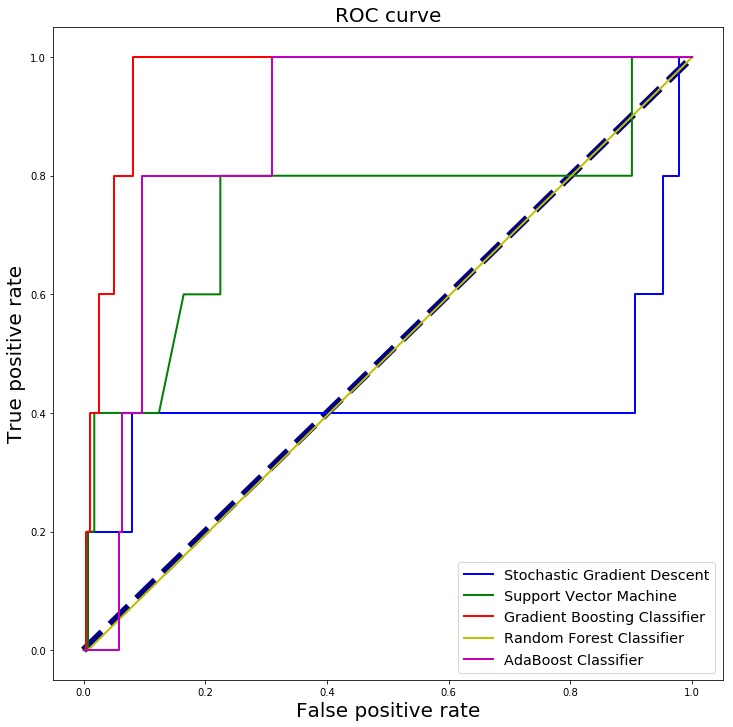

In [25]:
fpr1, tpr1, _ = roc_curve(y_test, y_pred_M1)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_M2)
fpr3, tpr3, _ = roc_curve(y_test, y_pred_M3)
fpr4, tpr4, _ = roc_curve(y_test, y_pred_M4)
fpr5, tpr5, _ = roc_curve(y_test, y_pred_M5)

# Construct roc-curve
plt.figure(figsize=(12, 12))
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', linewidth=7)
plt.plot(fpr1, tpr1, 'b', linewidth=2, label='Stochastic Gradient Descent')
plt.plot(fpr2, tpr2, 'g',linewidth=2, label='Support Vector Machine')
plt.plot(fpr3, tpr3, 'r',linewidth=2, label='Gradient Boosting Classifier')
plt.plot(fpr4, tpr4, 'y',linewidth=2, label='Random Forest Classifier')
plt.plot(fpr5, tpr5, 'm',linewidth=2, label='AdaBoost Classifier')
plt.xlabel('False positive rate', fontsize=20)
plt.ylabel('True positive rate', fontsize=20)
plt.title('ROC curve', fontsize=20)
plt.legend(loc='best', fontsize = 'x-large')
plt.savefig('ROC.png')
plt.show()

## Visualization

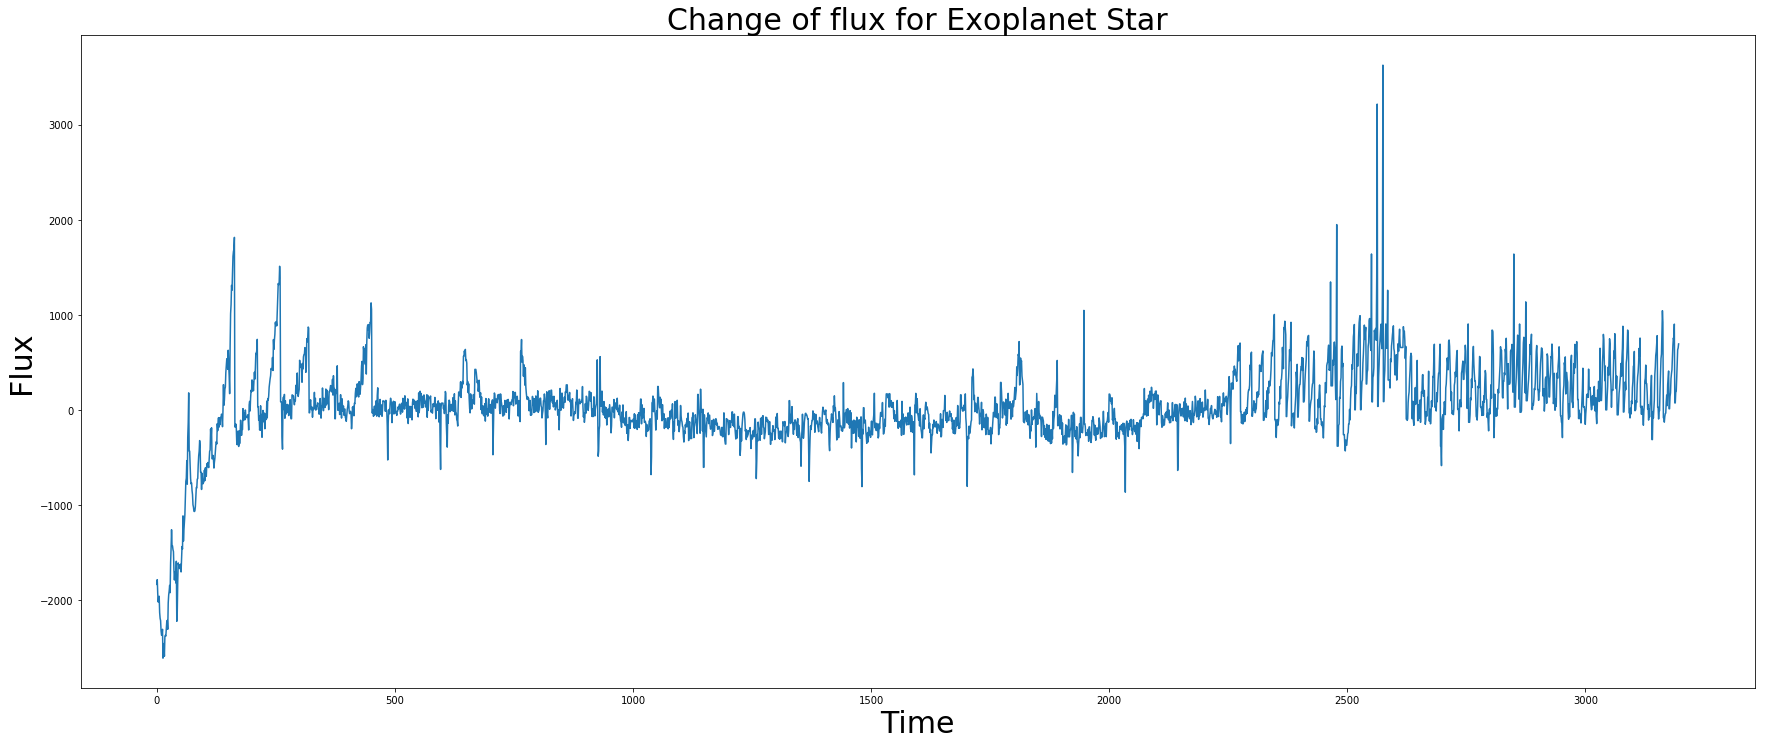

In [47]:
plt.figure(figsize=(30,12))
vis1 = X_train.iloc[20,:]
vis1 = np.array(vis1)
plt.plot(vis1)
plt.title("Change of flux for Exoplanet Star", fontsize=30)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Flux', fontsize=30)
plt.savefig('1.png')
plt.show()

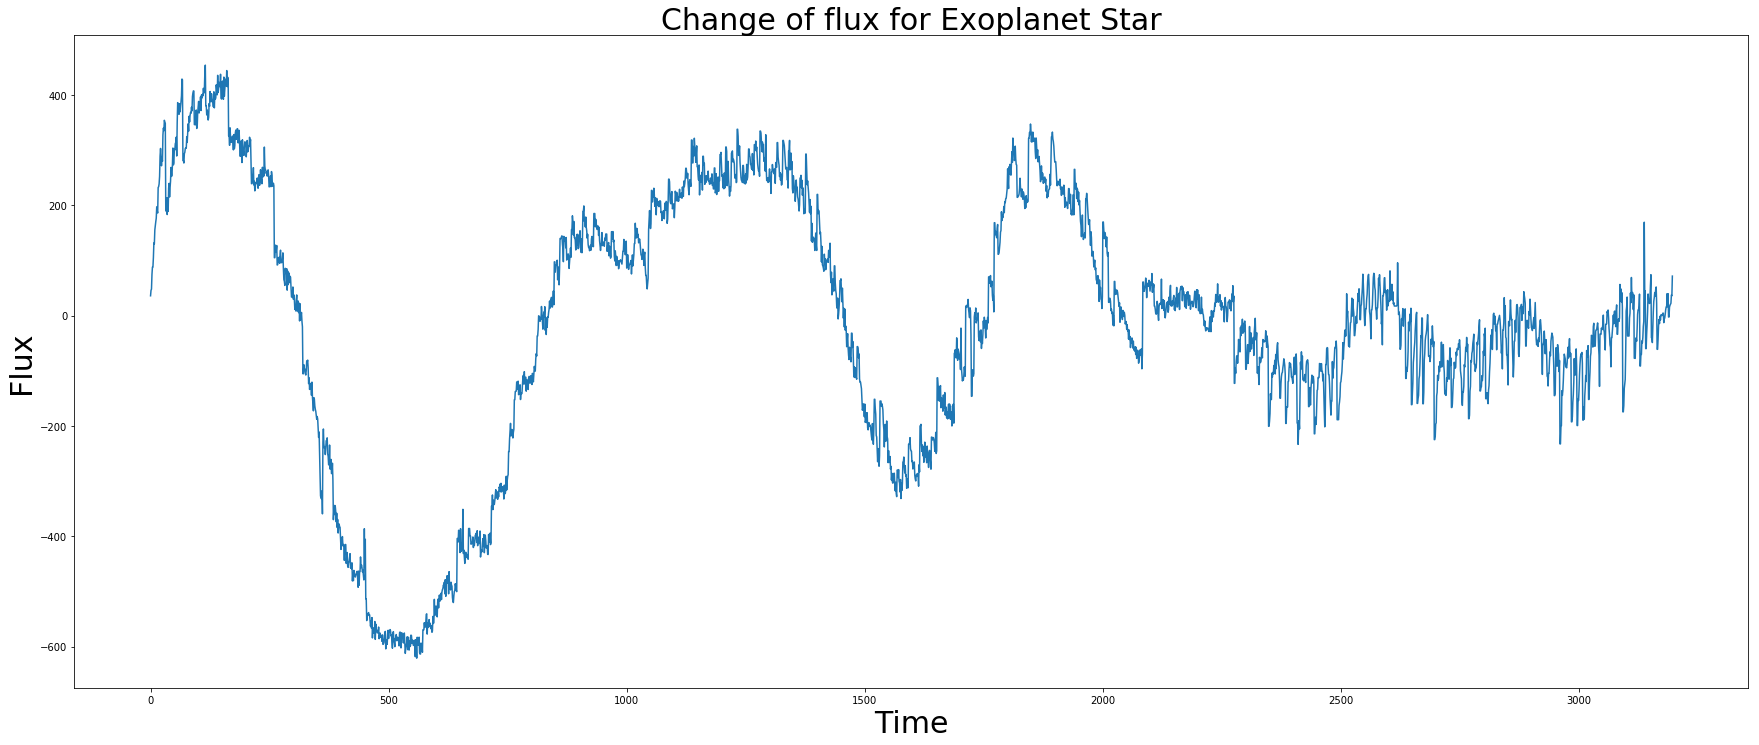

In [48]:
plt.figure(figsize=(30,12))
vis2 = X_train.iloc[15,:]
vis2 = np.array(vis2)
plt.plot(vis2)
plt.title("Change of flux for Exoplanet Star", fontsize=30)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Flux', fontsize=30)
plt.savefig('2.png')
plt.show()

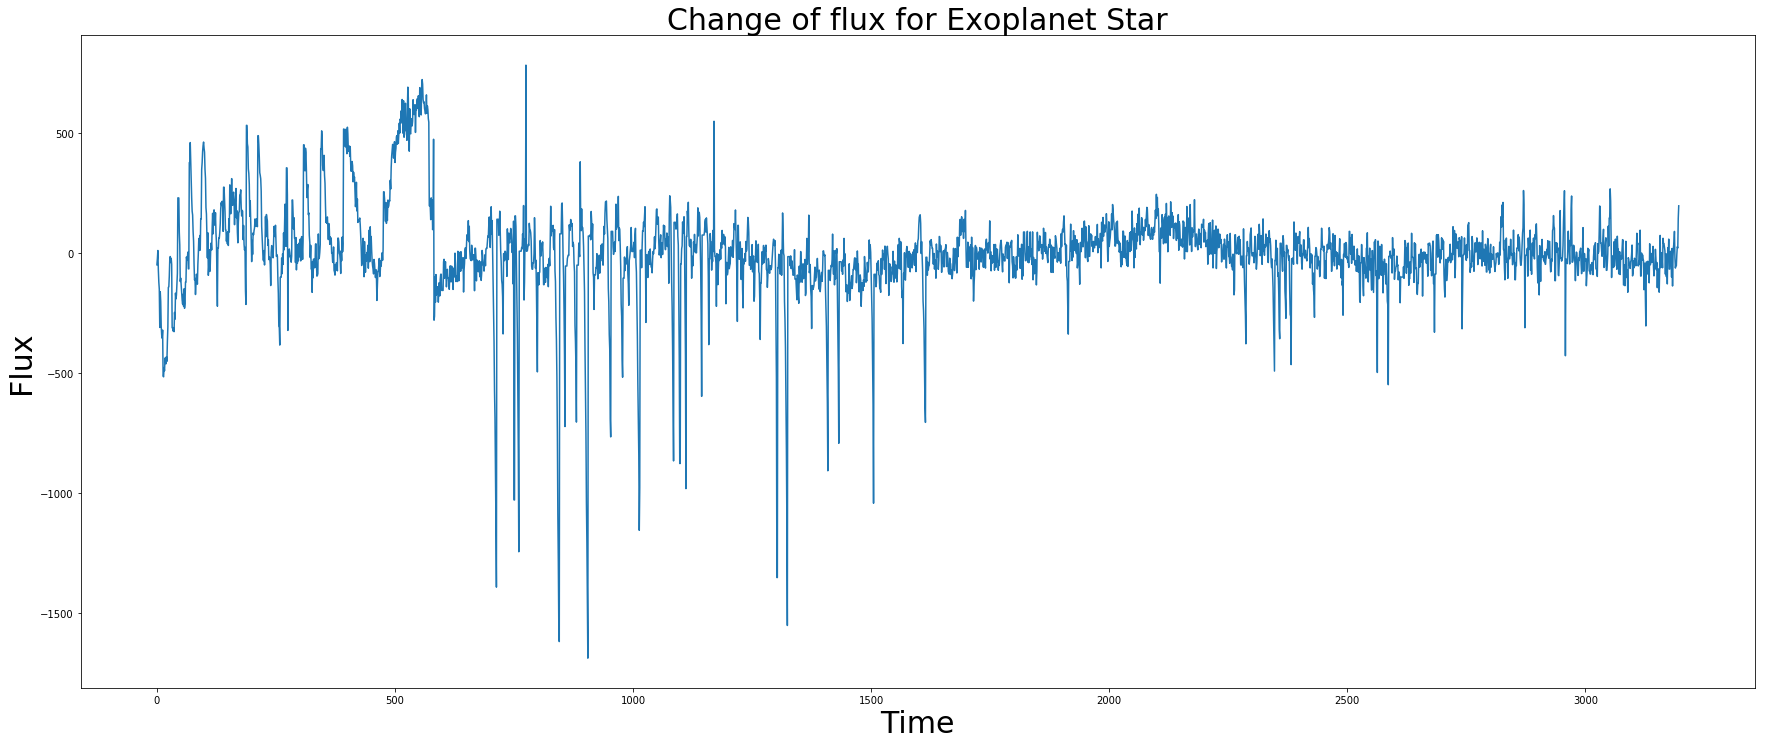

In [49]:
plt.figure(figsize=(30,12))
vis3 = X_train.iloc[22,:]
vis3 = np.array(vis3)
plt.plot(vis3)
plt.title("Change of flux for Exoplanet Star", fontsize=30)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Flux', fontsize=30)
plt.savefig('3.png')
plt.show()

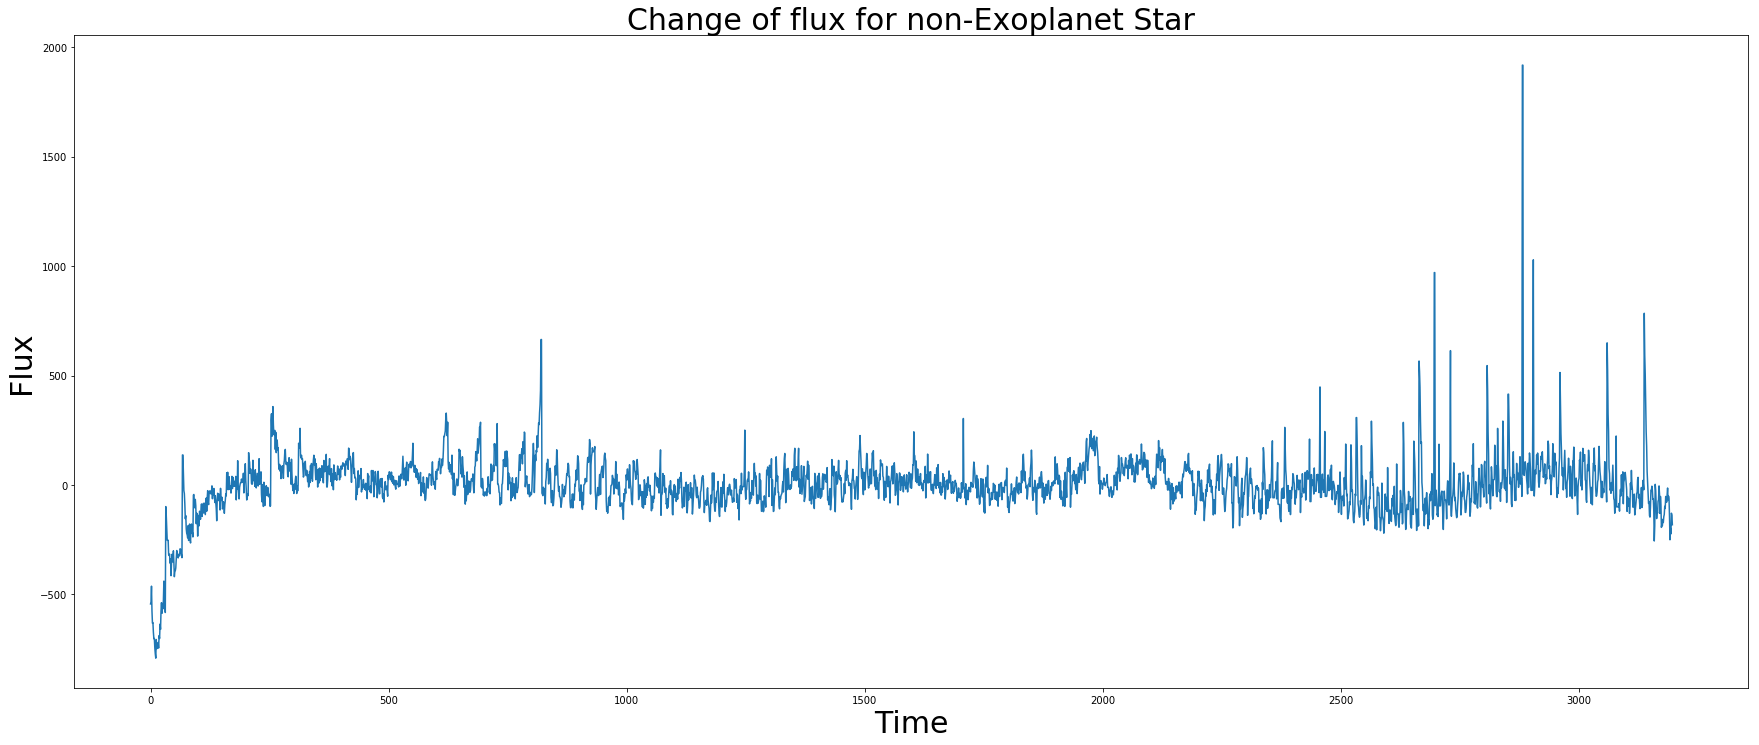

In [50]:
plt.figure(figsize=(30,12))
vis4 = X_train.iloc[2725,:]
vis4 = np.array(vis4)
plt.plot(vis4)
plt.title("Change of flux for non-Exoplanet Star", fontsize=30)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Flux', fontsize=30)
plt.savefig('4.png')
plt.show()

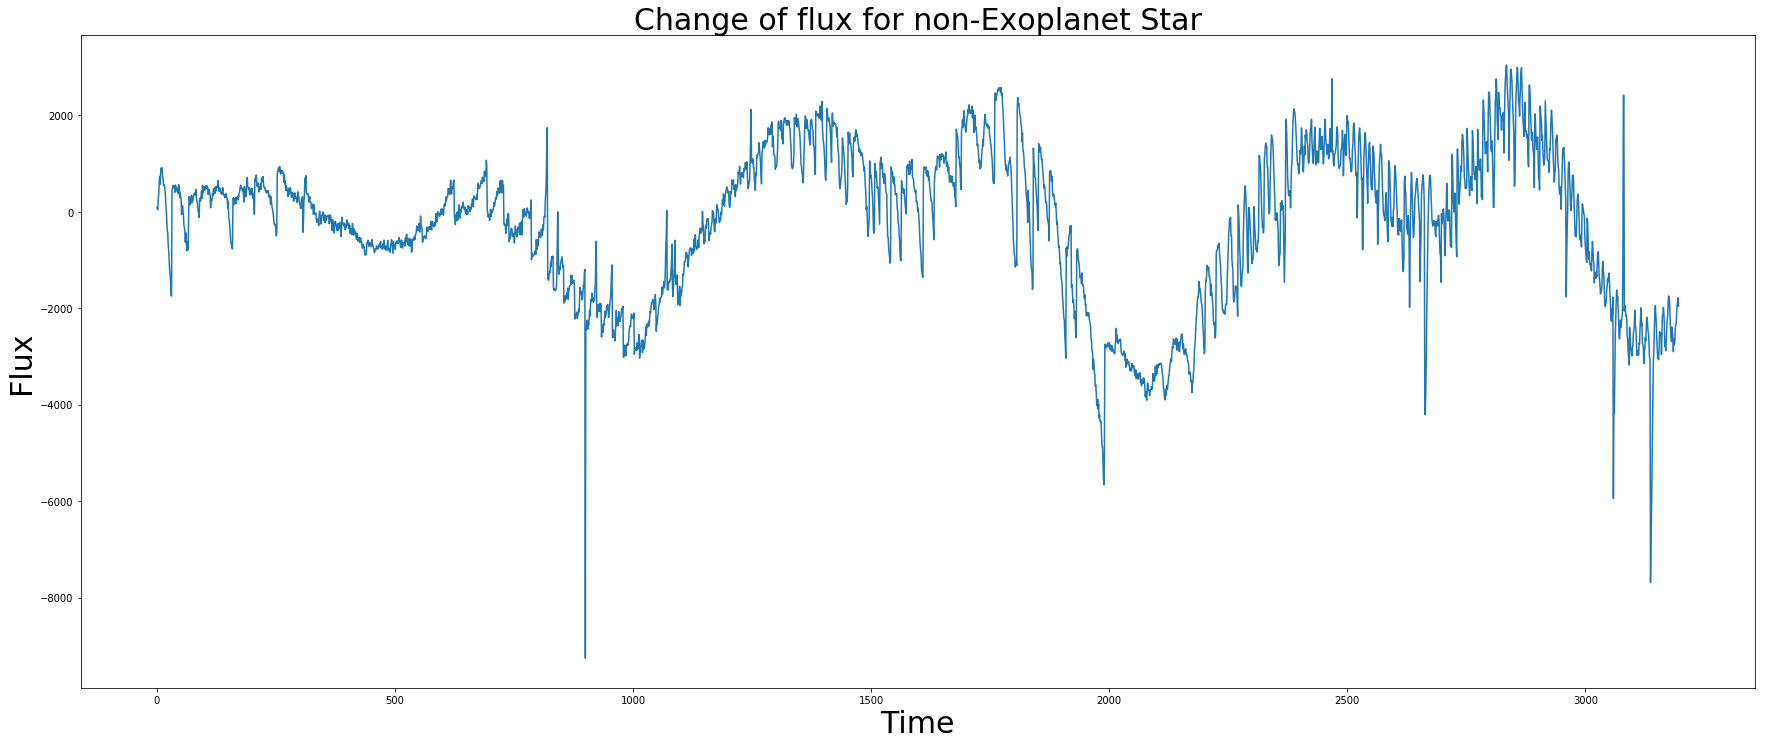

In [51]:
plt.figure(figsize=(30,12))
vis5 = X_train.iloc[3273,:]
vis5 = np.array(vis5)
plt.plot(vis5)
plt.title("Change of flux for non-Exoplanet Star", fontsize=30)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Flux', fontsize=30)
plt.savefig('5.png')
plt.show()

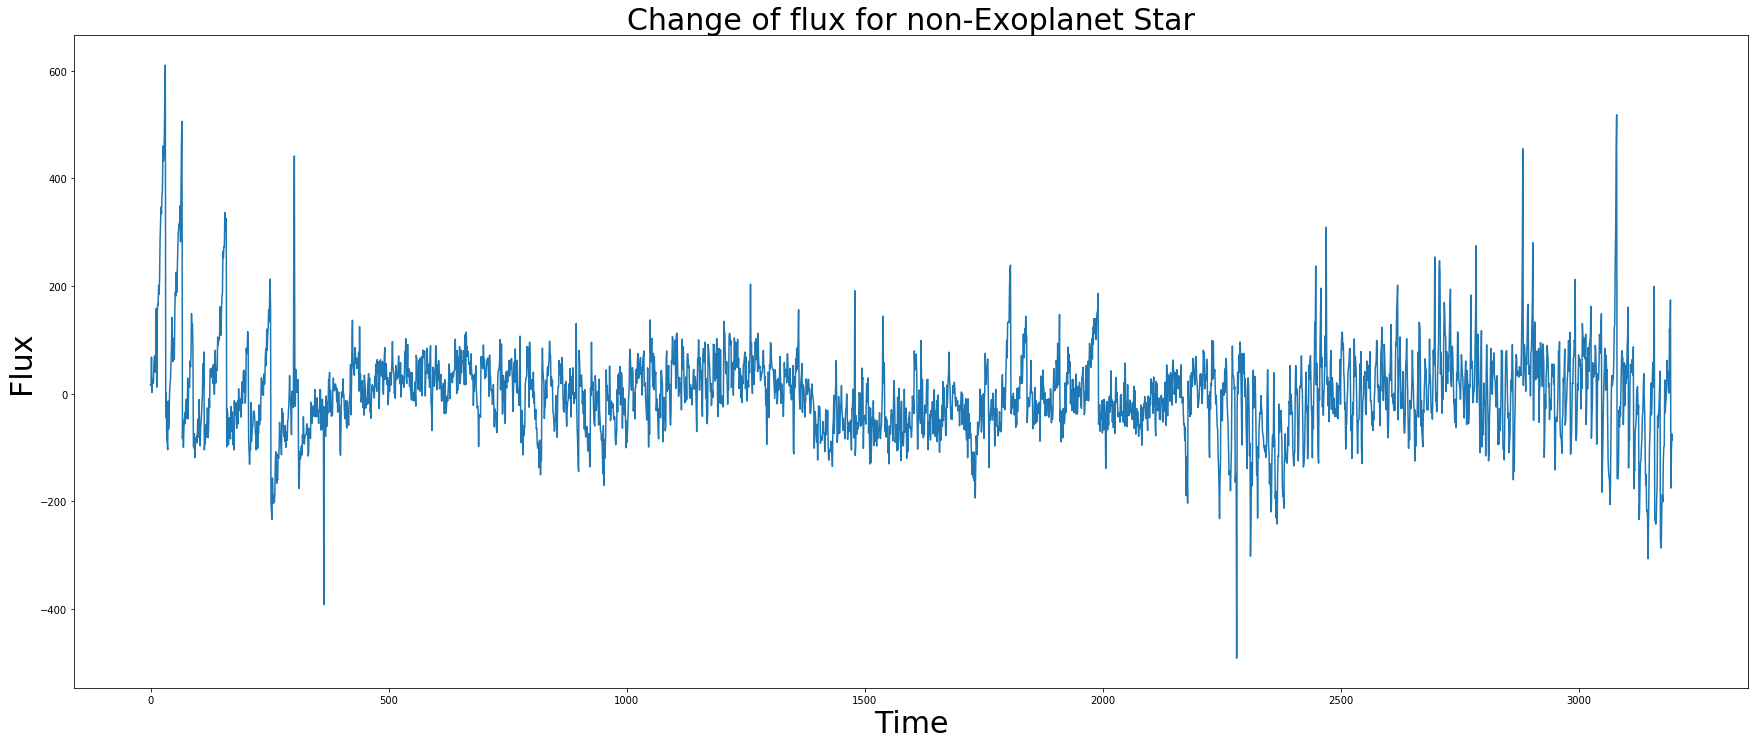

In [52]:
plt.figure(figsize=(30,12))
vis6 = X_train.iloc[4120,:]
vis6 = np.array(vis6)
plt.plot(vis6)
plt.title("Change of flux for non-Exoplanet Star", fontsize=30)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Flux', fontsize=30)
plt.savefig('6.png')
plt.show()